#Supervised Learning in R

In [20]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [35]:
%%R

data(iris)
str(iris)

n <- dim(iris)[1]
p <- dim(iris)[2]

print(table(iris$Species))

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...

    setosa versicolor  virginica 
        50         50         50 


In [36]:
%%R

attach(iris)    # attach the iris namespace to our namespace

The following objects are masked from iris (pos = 4):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



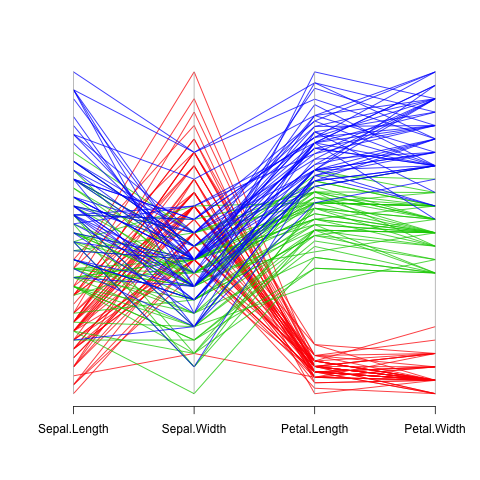

In [22]:
%%R

#  load the "MASS" library

library(MASS)  #  get the lda() function, and the parcoord() function

#  plot the data as a parallel coordinates plot

parcoord(iris[,1:4],  col=c("red", "green3", "blue")[unclass(iris$Species)])


##generate a training set

In [23]:
%%R

iris_ids = (1:n)

training_set = sample(iris_ids, 75)     # Generate a random sample of size 75
print(training_set)

testing_set  = iris_ids[-training_set]  # The set complement of training_set


 [1]  62  22  44  57  47  16  42 118  89   8  81  41   9  72  78  90  31  97 124
[20] 114 133  73  29  98 127  84  86   4  34 120  18  14  46 115 141   6 121 150
[39] 145  69  30  45  68  26  24  66  39 108  99 136  38 139  21  79  83  64 125
[58] 100  54 112 143 126 130  94  93  76 149 119 144  51  11   2  87 135  71


In [24]:
%%R

print(table(Species))                  # table of occurrences of each iris type
print(table(Species[training_set]))    # Tabulate species for the training set
print(table(Species[testing_set]))     # Tabulate species for the testing set

Species
    setosa versicolor  virginica 
        50         50         50 

    setosa versicolor  virginica 
        25         27         23 

    setosa versicolor  virginica 
        25         23         27 


##create a model on the training set

In [25]:
%%R

ldaModel = lda( Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width,
                 subset = training_set )
ldaModel


Call:
lda(Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width, 
    subset = training_set)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3600000  0.3066667 

Group means:
           Petal.Length Petal.Width Sepal.Length Sepal.Width
setosa         1.492000    0.268000     4.976000    3.388000
versicolor     4.292593    1.374074     5.988889    2.811111
virginica      5.569565    2.017391     6.582609    2.947826

Coefficients of linear discriminants:
                   LD1        LD2
Petal.Length -2.572230  0.5743598
Petal.Width  -1.886003 -2.4449339
Sepal.Length  1.173670  0.4280955
Sepal.Width   1.006649 -2.2708446

Proportion of trace:
   LD1    LD2 
0.9945 0.0055 


## find out how well the model predicts the remaining data (testing_set)

In [26]:
%%R

predictions = predict( ldaModel, iris[ testing_set ,] )
print(predictions$class)

 [1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     setosa     setosa     setosa    
[19] setosa     setosa     setosa     setosa     setosa     setosa    
[25] setosa     versicolor versicolor versicolor versicolor versicolor
[31] versicolor versicolor versicolor versicolor versicolor versicolor
[37] versicolor versicolor versicolor versicolor versicolor versicolor
[43] versicolor versicolor versicolor versicolor versicolor versicolor
[49] virginica  virginica  virginica  virginica  virginica  virginica 
[55] virginica  virginica  virginica  virginica  virginica  virginica 
[61] virginica  virginica  virginica  virginica  virginica  virginica 
[67] virginica  versicolor virginica  virginica  virginica  virginica 
[73] virginica  virginica  virginica 
Levels: setosa versicolor virginica


In [27]:
%%R

incorrect.prediction  =  (predictions$class != Species[testing_set])

cat("\nLDA prediction was wrong on these points\n")

print(testing_set[ incorrect.prediction ])          # ids  for which prediction was incorrect

print(iris[ testing_set[incorrect.prediction], ])   # data for which prediction was incorrect



LDA prediction was wrong on these points
[1] 134
    Sepal.Length Sepal.Width Petal.Length Petal.Width   Species
134          6.3         2.8          5.1         1.5 virginica


In [28]:
%%R

confusion_matrix = table( Species[testing_set], predictions$class )
print(confusion_matrix)

m = length(testing_set)
print(m)

accuracy = (m - sum(incorrect.prediction))/m
print(accuracy)


            
             setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         23         0
  virginica       0          1        26
[1] 75
[1] 0.9866667


##Test the model on the whole dataset

In [32]:
%%R

predictions = predict( ldaModel, iris )
print(predictions$class)

incorrect.prediction  =  (predictions$class != Species)
print(incorrect.prediction)

  [1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor virginica  versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor vir

In [33]:
%%R

print(iris_ids[ incorrect.prediction ]) # ids  for which prediction was incorrect
print(iris[ incorrect.prediction , ])   # data for which prediction was incorrect

[1]  71  84 134
    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
71           5.9         3.2          4.8         1.8 versicolor
84           6.0         2.7          5.1         1.6 versicolor
134          6.3         2.8          5.1         1.5  virginica


In [34]:
%%R

accuracy = (n - sum(incorrect.prediction))/n
print(accuracy)

confusion_matrix = table( Species, predictions$class )
print(confusion_matrix)

[1] 0.98
            
Species      setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          1        49


##detach the iris namespace

In [31]:
%%R

detach(iris)  # remove iris namespace